In [2]:
# import the pandas library
import pandas as pd
import numpy as np

In [3]:
# read csv
df = pd.read_csv("C:\\Users\\kunal rajesh pitale\\Downloads\\flight2\\flight_prices.csv") 

In [ ]:
print(df.info)

In [ ]:
# getting the columns of the dataset
columns = list(df.columns)
print(columns)

In [ ]:
# To print first five samples
print(df.head()) 

In [ ]:
#Describing dataset 
print(df.describe()) 

In [ ]:
#New dataframe 
new_df = df
#new_df.isnull()
#Checking for null values 
print('Missing Values:')
print(new_df.isnull().sum()) 


In [ ]:
df_cleaned = new_df.isnull()
print(df_cleaned.isnull())

In [ ]:
#print(new_df.shape) 


In [ ]:
# Imputation using mean
df_imputed_mean = new_df.fillna(df.mean())

# Imputation using median
df_imputed_median = new_df.fillna(df.median())

# Forward fill
df_ffill = df.ffill()

# Backward fill
df_bfill = df.bfill()

In [ ]:
# #Checking for duplicates
print(new_df.duplicated().any()) 
print(new_df.duplicated())
print(new_df.shape) 

In [ ]:
print("Column datatypes: ")
print(new_df.dtypes)

In [ ]:
#Replacing string values with integer 
new_df["stops"].replace({"zero":"0", "one":"1", "two_or_more":"2 or <2"}, inplace = True) 
print(new_df.head())
print(new_df.shape) 

In [ ]:
#Finding unique values in "Region" 
print(new_df["stops"].unique()) 

In [ ]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

In [ ]:
# Eliminate null values
df.dropna(inplace=True)

# Eliminate duplicate values
df.drop_duplicates(inplace=True)

print(df)

In [ ]:
#New dataframe 
new_df = df
#new_df.isnull()
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())
#print(new_df.shape) 
#new_df.duplicated()

In [4]:
 #Import dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


Figure(1000x400)


<AxesSubplot:xlabel='price'>

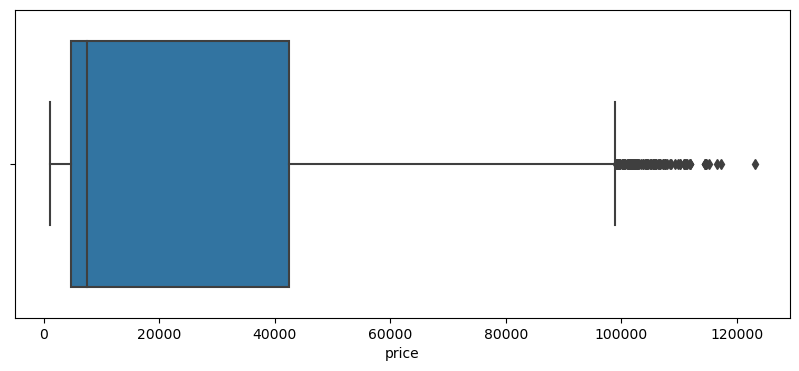

In [5]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "price", data = df) 


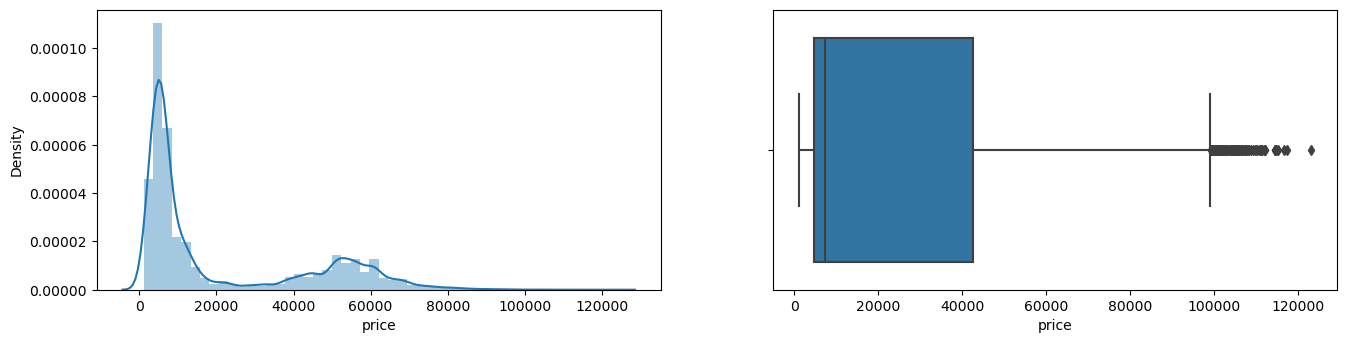

In [6]:
# compare plots before trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.show()

In [7]:
# finding boundary values for bmi using z-score
print("Highest allowed",df['price'].mean() + 3*df['price'].std())
print("Lowest allowed",df['price'].mean() - 3*df['price'].std())

Highest allowed 88982.96262136086
Lowest allowed -47203.64157509444


In [8]:
# finding outliers for bmi
df[(df['price'] > 88982.96262136086) | (df['price'] < -47203.64157509444)]

,unamed,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206787,206787,Vistara,Delhi,4,yes,5,Mumbai,Business,26.83,2,95657
206878,206878,Vistara,Delhi,3,yes,5,Mumbai,Business,7.58,3,91575
210742,210742,Vistara,Delhi,1,yes,3,Mumbai,Business,6.50,38,90281
210743,210743,Vistara,Delhi,1,yes,5,Mumbai,Business,13.83,38,90281
215854,215854,Vistara,Delhi,4,yes,2,Kolkata,Business,13.83,1,90057
...,...,...,...,...,...,...,...,...,...,...,...
299018,299018,Vistara,Chennai,2,yes,4,Hyderabad,Business,10.17,25,89537
299407,299407,Vistara,Chennai,1,yes,4,Hyderabad,Business,10.00,33,89537
299458,299458,Vistara,Chennai,2,yes,4,Hyderabad,Business,10.17,34,89537
299700,299700,Vistara,Chennai,1,yes,4,Hyderabad,Business,10.00,39,89537


In [9]:
# Trimming of outliers for bmi
df2 = df[(df['price'] < 88982.96262136086) & (df['price'] > -47203.64157509444)]
df2

,unamed,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,Delhi,4,No,5,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,Delhi,1,No,2,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,Delhi,1,No,1,Mumbai,Economy,2.17,1,5956
3,3,Vistara,Delhi,2,No,3,Mumbai,Economy,2.25,1,5955
4,4,Vistara,Delhi,2,No,2,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,Chennai,2,yes,4,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,Chennai,3,yes,5,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,Chennai,1,yes,5,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,Chennai,1,yes,4,Hyderabad,Business,10.00,49,81585


In [10]:
li_outlier_cols = ['price']


In [11]:
# finding IQR
for i in li_outlier_cols:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[i] = df[i].apply(lambda x: lower_limit if x < lower_limit else
    upper_limit if x > upper_limit else x)
#df1[''] = df1[df2['']<lower_limit) and (df1['']>upper_limit)]

In [12]:
 # finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

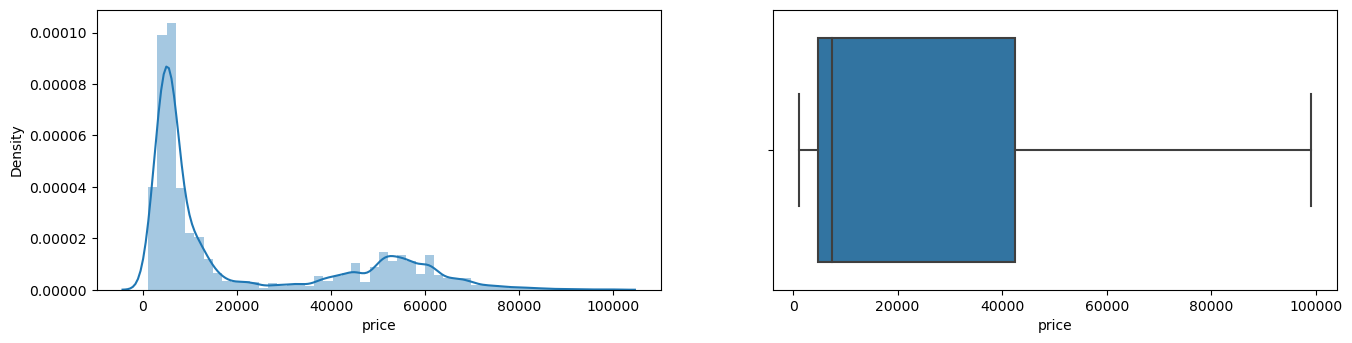

In [13]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

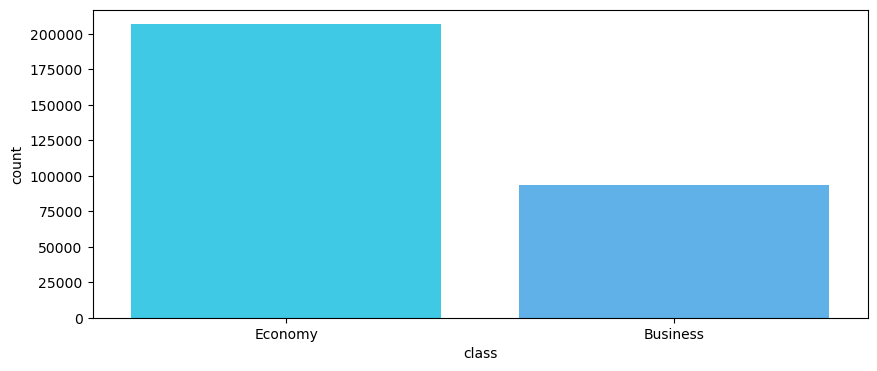

In [14]:
#DISTRIBUTION OF ECONOMY CLASS OF PASSENGERS
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("cool")
sns.set_palette(color_palette)
sns.countplot(x = "class", data = df)

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [ ]:
#x = df.drop('Attrition', axis=1)
x = df.drop(['class', 'airline'], axis=1)
y = df['class']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [ ]:
y_train.shape, y_test.shape

In [ ]:
y_test.value_counts()/len(y_test)

In [ ]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['airline'],prefix = str('airline'),prefix_sep='_')],axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
#smote technique
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After',counter)
sns.countplot(x=y_train_sm)
plt.title('Churn Label after SMOTE')
plt.xlabel('Count')
plt.ylabel('Churn')
plt.show()

In [ ]:
# Finding correlation
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("Blues")
sns.heatmap(df2.corr(), vmax=0.9, annot=True,cmap = color)